In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_us = pd.read_csv('us.csv', parse_dates=True, index_col='Date')
df_st = pd.read_csv('state.csv', parse_dates=True, index_col='Date')

In [2]:
print(df_us.sample(10))
print('\n' + '* ' * 45)
print(df_st.sample(10))

            Confirmed  Cumulated_Confirmed  Deaths  Cumulated_Deaths  \
Date                                                                   
2020-05-05      22226              1193409    2435             65028   
2020-05-20      22344              1538094    1528             87184   
2020-05-26      16653              1663379     634             92605   
2020-05-21      24942              1563036    1286             88470   
2020-08-16      42181              5314677     616            158470   
2020-01-30          1                    6       0                 0   
2020-05-31      21686              1774034     605             97959   
2020-03-11        269                 1205       6                37   
2020-07-02      54869              2695495     671            118369   
2020-06-19      30927              2182035     682            111499   

            Recovered  Cumulated_Recovered  
Date                                        
2020-05-05      12560               200628  


In [3]:
print(df_us.info())
print('\n' + '* ' * 45)
print(df_st.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Confirmed            186 non-null    int64
 1   Cumulated_Confirmed  186 non-null    int64
 2   Deaths               186 non-null    int64
 3   Cumulated_Deaths     186 non-null    int64
 4   Recovered            186 non-null    int64
 5   Cumulated_Recovered  186 non-null    int64
dtypes: int64(6)
memory usage: 10.2 KB
None

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-21 to 2020-08-17
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AK      186 non-null    int64
 1   AZ      186 non-null    int64
 2   CA      186 non-null    int64
 3   CO      186 non-null    int64
 4   HI      186 non-nu

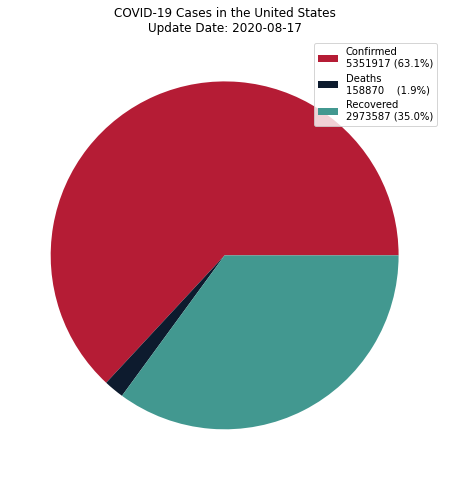

In [13]:
colors = ['#B51C35', '#0D1B2E', '#429890']
update_date = '2020-08-17'
n_cases = [df_us.loc[update_date, 'Cumulated_Confirmed'],
           df_us.loc[update_date, 'Cumulated_Deaths'],
           df_us.loc[update_date, 'Cumulated_Recovered']]

labels = ['Confirmed\n{} ({:.1f}%)'.format(n_cases[0],  100 * n_cases[0]/sum(n_cases)), 
          'Deaths\n{}    ({:.1f}%)'.format(n_cases[1],  100 * n_cases[1]/sum(n_cases)), 
          'Recovered\n{} ({:.1f}%)'.format(n_cases[2],  100 * n_cases[2]/sum(n_cases))]

title = 'COVID-19 Cases in the United States\nUpdate Date: {}'.format(update_date)

plt.pie(n_cases, colors=colors)
plt.gcf().set_size_inches(8,8)
plt.legend(labels)
plt.title(title)
plt.show()

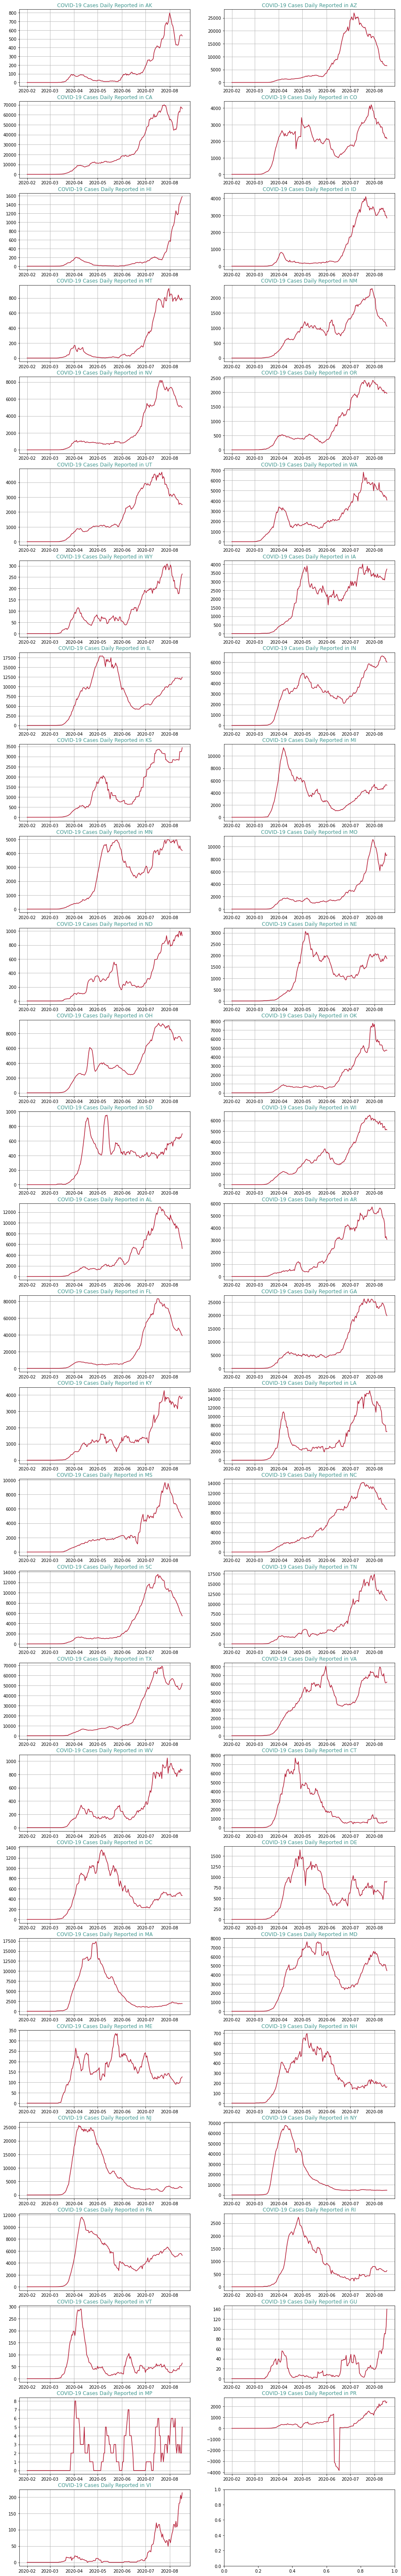

In [16]:
rolling_window = 7
rolling_states = df_st.rolling(rolling_window).sum()
cases = {colors[0]: 'Confirmed', colors[1]: 'Deaths', colors[2]: 'Recovered'}

fig, axes = plt.subplots(28, 2, figsize=(16,112))
states = df_st.columns.to_list()

for k in range(len(states)):
    ax, state = axes[k // 2][k % 2], states[k]
    ax.plot(rolling_states[state], color=colors[0])
    ax.set_title('COVID-19 Cases Daily Reported in {}'.format(state), color=colors[2])
    ax.grid()

plt.show()



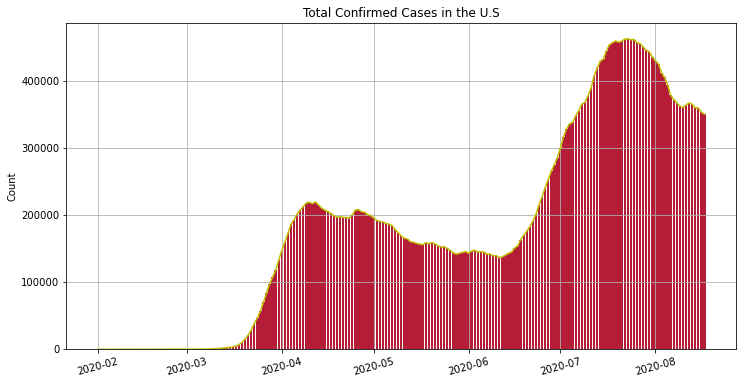

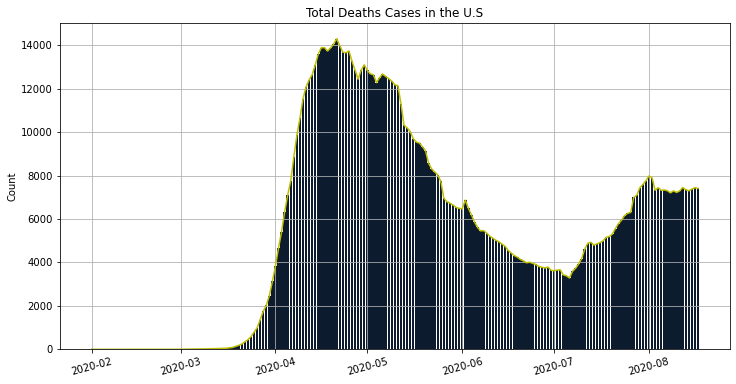

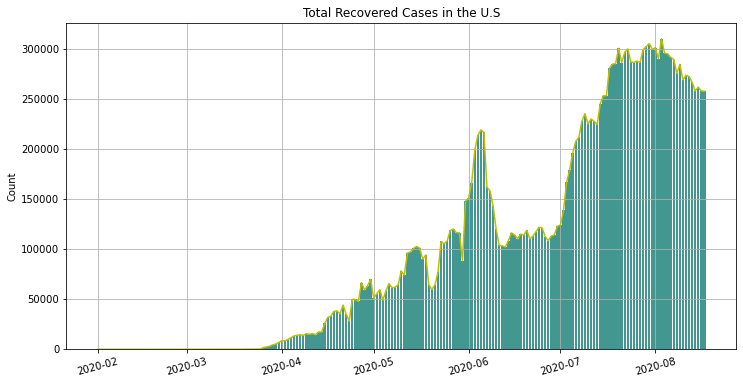

In [21]:
rolling_us = df_us[cases.values()].rolling(rolling_window).sum()
for color , case in cases.items():
    plt.bar(rolling_us.index, rolling_us[case], color=color)
    plt.plot(rolling_us.index, rolling_us[case], color='y')
    plt.ylabel('Count')
    plt.xticks(rotation=15)
    plt.grid()
    plt.title('Total {} Cases in the U.S'.format(case))
    plt.gcf().set_size_inches(12,6)
    plt.show()